In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
rng = numpy.random
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.078045189 W= 0.23169057 b= 0.93025947


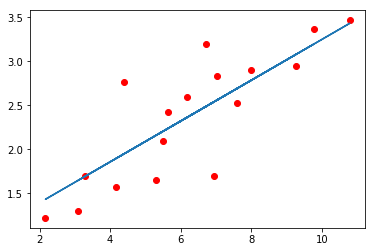

Epoch: 0100 cost= 0.077925012 W= 0.23275518 b= 0.9226006


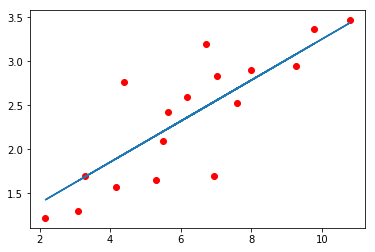

Epoch: 0150 cost= 0.077818625 W= 0.2337565 b= 0.91539735


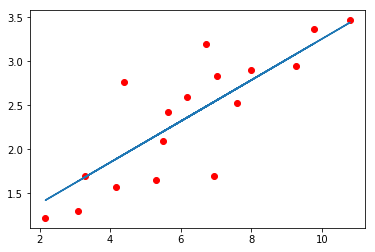

Epoch: 0200 cost= 0.077724405 W= 0.23469831 b= 0.9086221


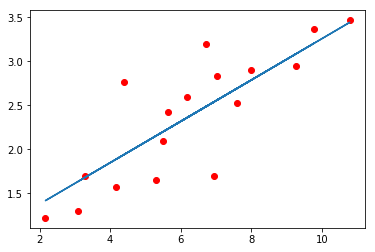

Epoch: 0250 cost= 0.077641003 W= 0.23558404 b= 0.9022504


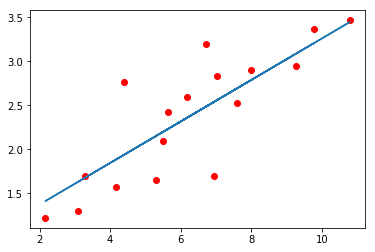

Epoch: 0300 cost= 0.077567130 W= 0.23641716 b= 0.8962568


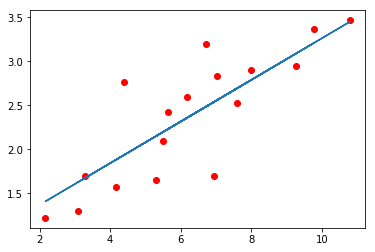

Epoch: 0350 cost= 0.077501722 W= 0.23720077 b= 0.8906194


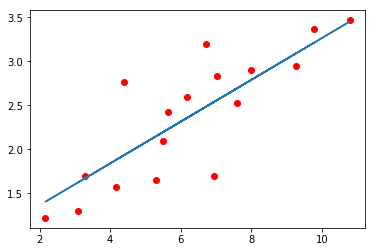

Epoch: 0400 cost= 0.077443771 W= 0.23793778 b= 0.8853176


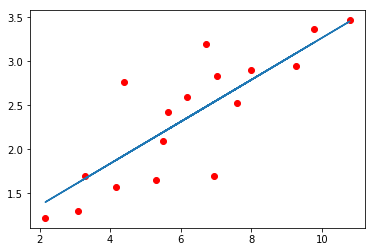

Epoch: 0450 cost= 0.077392481 W= 0.23863094 b= 0.8803308


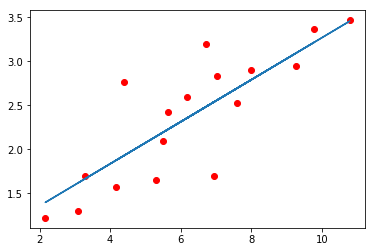

Epoch: 0500 cost= 0.077347025 W= 0.23928297 b= 0.87564015


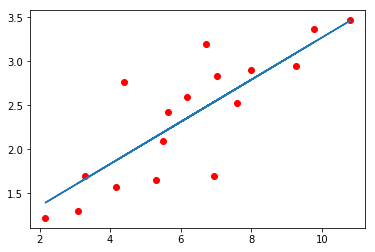

Epoch: 0550 cost= 0.077306770 W= 0.23989616 b= 0.87122875


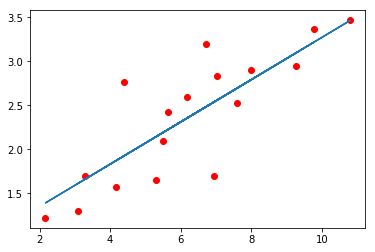

Epoch: 0600 cost= 0.077271111 W= 0.24047288 b= 0.8670804


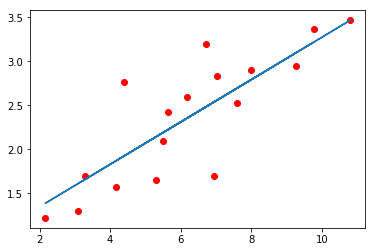

Epoch: 0650 cost= 0.077239528 W= 0.2410153 b= 0.86317766


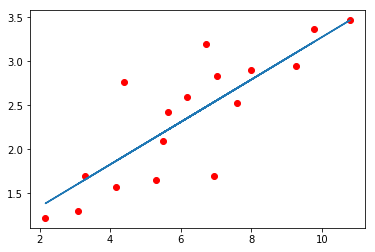

Epoch: 0700 cost= 0.077211514 W= 0.24152553 b= 0.8595077


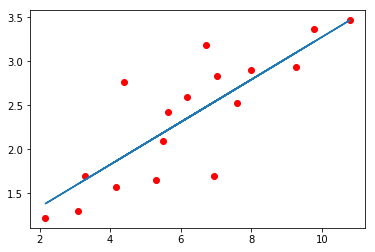

Epoch: 0750 cost= 0.077186719 W= 0.24200535 b= 0.8560556


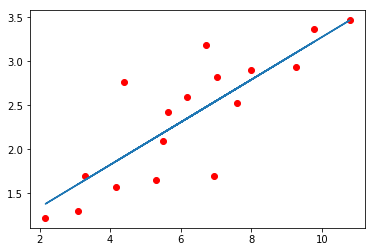

Epoch: 0800 cost= 0.077164732 W= 0.2424567 b= 0.8528087


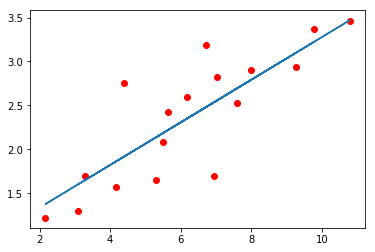

Epoch: 0850 cost= 0.077145264 W= 0.24288127 b= 0.8497544


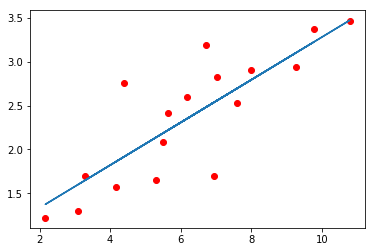

Epoch: 0900 cost= 0.077127978 W= 0.24328044 b= 0.84688294


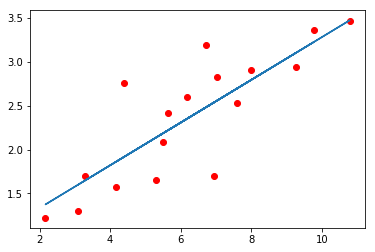

Epoch: 0950 cost= 0.077112682 W= 0.24365604 b= 0.8441807


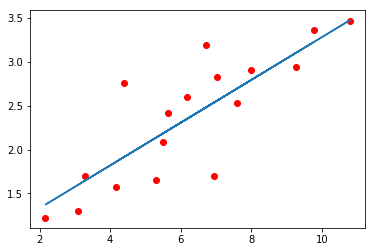

Epoch: 1000 cost= 0.077099100 W= 0.24400915 b= 0.8416406


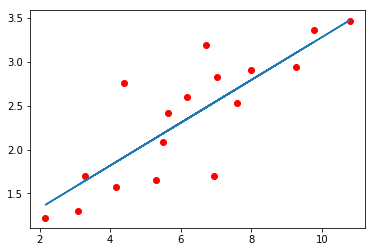

Optimization Finished!
Training cost= 0.0770991 W= 0.24400915 b= 0.8416406 



In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
            plt.plot(train_X, train_Y, 'ro', label='Original data')
            plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
            plt.show()

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    